# Basics of Machine Learning `part 1`

In [ ]:
%pylab inline

## Table of Contents
<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Machine Learning](#machinelearning)
- [Machine learning in python](#ml_python)
- [The Iris Dataset](#toyexample)
- [Training a Classifier on the Iris Dataset](#toyex_training)
- [Testing a Classifier on the Iris Dataset](#toyex_testing)

<a name="machinelearning"></a>
# Machine Learning

Machine learning has become recently a hot topic present in scientific literature as well as in the general public literature. Roughly saying, machine learning is *way* for computer to learn from data, and consequently, has been  at the heart of artificial intelligence algorithms. 

ML is nowadays already in many of the products we use Today from recommendation systems able to provide personnalized recommendations for filems (Netflix), music (Apple Music) or more general products (Amazon). Machine learning is also widely used to filters our spam, to recognise voice in personnal assistants, etc. 

> A formal definition of **machine learning** (ML) can be: a set of methods that can **automatically detect patterns** in data, and then use the uncovered patterns to **predict future data** (*from Machine Learning: A Probabilistic Perspective (Murphy 2012)*)

<a name="ml_types"></a>
## Types of learning

What are the types of "learning"? In ML literature, there are several types of learning, the three main types are: supervised learning, unsupervised learning and reinforcement learning. 

In supervised learning, you have access to a dataset where each datapoint, considered as an *input*, has an associated known output, that can be discrete (like a *label*) or continuous. 

The goal of a supervised learning algorithm is to learn the relationship between the inputs and their associated outputs. In case the outputs are discrete (*labels*) we call the task **classification**, in case the outputs are continous, the task is called **regression**. 

<img src="assets/supervised_learning.png" width=400px></img>


In unsupervised learning, you have acess to a dataset where there are only *inputs* (datapoints without associated labels or some values). The goal of an unsupervised learning algorithm is then to infer from these data the underlying structure. This task is usually harder than supervised learning. 

<img src="assets/unsupervised_learning.png" width=400px></img>

Reinforcement learning is a different paradigm: the learning occurs through interaction with the environment. In reinforcement learning, an agent takes actions in an environment such as to maximize some cumulative rewards. Each action taken produces a reward that the agent takes into account in order to assess the "quality" of the action. 


<a name="ml_phases"></a>
## Phases

In ML, we usually consider two phases: **learning** then **testing**. 

**Training** an algorithm in machine learning means detecting patterns in a dataset. 

**Testing** an algorithm means predicting future data, that is generalizing the uncovered trained patterns to new datasets



<a name="ml_python"></a>
# Machine Learning in Python

At this stage of the course, you should have installed Python 3, Jupyter Notebook and all the useful lirbaries used in this course (like sklearn). If not, please refer to the README.md 

## Quick introduction to jupyter notebook

### Cell
Cell in jupyter notebook is where we write code or text that can be executed (or interpreted). 


In [4]:
9 + 2 + 1

12

### Import libraries 

At this stage, you cannot do much except calling the basic python functions such as '+' or '-' (and others). To be able to use additional functions we use libraries. Libraries are collections of functions that can be called in python programs. In order to use the functions included in a library, you first have to `import` that library. For instance, we will import the library allowing for manipulating arrays (vectors, matrices, etc.). This library is called `numpy`:

In [8]:
import numpy

Now we can use functions within the numpy library, like creating a 2 x 3 matrix with zeros inside:

In [10]:
M = numpy.zeros((2, 3))

To visualise what `M` looks like, you can use the `print` function:

In [11]:
print(M)

[[0. 0. 0.]
 [0. 0. 0.]]


Note that the libray can be imported with a name (usually a shorter name), called a *namespace*. Namespaces make a code more readable and allow to define functions with a same name but within different namespaces. Numpy is usually imported as `np`:

In [12]:
import numpy as np

In [13]:
M = np.zeros((5, 4))
print(M)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Machine learning libraries that we will use:
- scikit learn https://scikit-learn.org/stable/index.html
- keras https://keras.io/

More details below.

### Plot data

Plotting data can be done using the `matplotlib` library (there are other ways to do, but this one is the most common and convenient as it uses matlab-like syntax). 

In [14]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's now try out this by plotting a simple vector of random values.

In [15]:
M = np.random.randn(10,1)

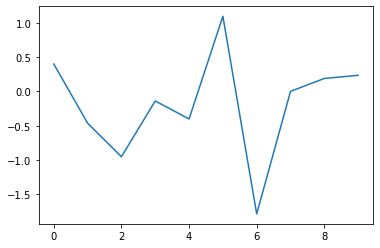

In [16]:
plt.plot(M)
plt.show()

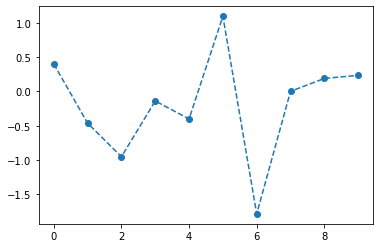

In [19]:
plt.plot(M, '--o')
plt.show()

Above we plotted the points sequentially, sometimes it is useful to display their **distribution**

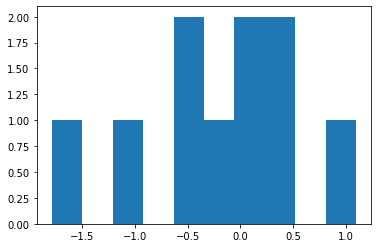

In [20]:
plt.hist(M)
plt.show()

<img src="assets/exerice-icon.png" style="width:80px; float:left;"></img><div style="clear:left;"></div>
**EXERCICE:**: Try with a **higher number** of radomnly generated points.

What is this shape? 

(array([  1.,   3.,   2.,   5.,   5.,   7.,  14.,  15.,  41.,  63.,  94.,
        113., 178., 228., 285., 325., 435., 467., 610., 596., 670., 686.,
        668., 678., 622., 552., 527., 465., 383., 325., 242., 188., 148.,
        129.,  85.,  45.,  39.,  19.,  16.,   4.,  10.,   6.,   3.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.]),
 array([-3.85217766, -3.67999552, -3.50781339, -3.33563126, -3.16344912,
        -2.99126699, -2.81908486, -2.64690272, -2.47472059, -2.30253846,
        -2.13035633, -1.95817419, -1.78599206, -1.61380993, -1.44162779,
        -1.26944566, -1.09726353, -0.92508139, -0.75289926, -0.58071713,
        -0.40853499, -0.23635286, -0.06417073,  0.1080114 ,  0.28019354,
         0.45237567,  0.6245578 ,  0.79673994,  0.96892207,  1.1411042 ,
         1.31328634,  1.48546847,  1.6576506 ,  1.82983274,  2.00201487,
         2.174197  ,  2.34637913,  2.51856127,  2.6907434 ,  2.86292553,
         3.03510767,  3.2072898 ,  3.37947193,  3.55165407,  3.7238362 ,
 

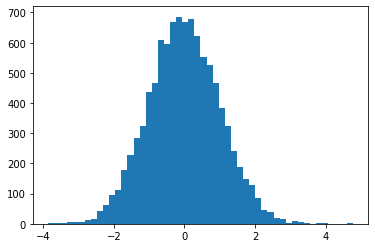

In [23]:
M = np.random.randn(10000,1)
plt.hist(M, bins=50)

## Sklearn: A machine learning library in python

Sklearn (or scikit-learn) is one of the most used machine learning library in python. The library includes the most common classifiers: Support Vector Machine (SVM), k-Nearest Neighbour (kNN), Gaussian Mixture Models (GMM); the reduction dimension techniques, such as Principal Component Analysis (PCA), Independent Component Analysis (ICA); techniques to split datasets, to preprocess data and cross-validate models. 

In [24]:
# Test if sklearn is installed:
import sklearn

**Sklearn API**: http://scikit-learn.org/stable/modules/classes.html

Deep learning:
- Tensorflow (google)
- Keras (google)
- PyTorch (facebook)
- ...
- ... 

<a name="toyexample"></a>
# The Iris dataset

An exemple of a toy dataset (simpler than realworld dataset).

<a name="toyex_description"></a>
## Dataset Description

This dataset consists of 3 different types of irises’ (**Setosa**, **Versicolour**, and **Virginica**) given by their:
* Sepal Length
* Sepal Width
* Petal Length 
* Petal Width.

![pic1](https://apps.rhs.org.uk/plantselectorimages/detail/RHS_PUB0001482_1050.JPG "pic1") Setosa

![pic1](https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg "pic1") Versicolour

![pic1](https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg "pic1") Virginica

The classes are encoded as integers: 
* Setosa = **0**
* Versicolour = **1**
* Virginica = **2**

Rows are the samples and the columns the feature dimensions (Sepal Length, Sepal Width, Petal Length and Petal Width).
```
sample 1: [ 5.1,  3.5,  1.4,  0.2] 
sample 2: [ 4.9,  3. ,  1.4,  0.2] 
sample 3: [ 4.7,  3.2,  1.3,  0.2] 
...
```

<a name="toyex_visualising"></a>
## Exploring the dataset

### Loading the data

The iris dataset is included in the `sklearn` library as a benchmark for the algorithms implemented. The iris dataset is part of the `datasets` python classes:

In [25]:
from sklearn import datasets
iris = datasets.load_iris()

In [26]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

The returned object `iris` includes the data (4-dimensional data points) and the labels (integer associated to each datapoint within the dataset).

In [27]:
features = iris.data
labels = iris.target

In [49]:
for i in range(len(features)):
    print(features[i], '=>', labels[i])

[5.1 3.5 1.4 0.2] => 0
[4.9 3.  1.4 0.2] => 0
[4.7 3.2 1.3 0.2] => 0
[4.6 3.1 1.5 0.2] => 0
[5.  3.6 1.4 0.2] => 0
[5.4 3.9 1.7 0.4] => 0
[4.6 3.4 1.4 0.3] => 0
[5.  3.4 1.5 0.2] => 0
[4.4 2.9 1.4 0.2] => 0
[4.9 3.1 1.5 0.1] => 0
[5.4 3.7 1.5 0.2] => 0
[4.8 3.4 1.6 0.2] => 0
[4.8 3.  1.4 0.1] => 0
[4.3 3.  1.1 0.1] => 0
[5.8 4.  1.2 0.2] => 0
[5.7 4.4 1.5 0.4] => 0
[5.4 3.9 1.3 0.4] => 0
[5.1 3.5 1.4 0.3] => 0
[5.7 3.8 1.7 0.3] => 0
[5.1 3.8 1.5 0.3] => 0
[5.4 3.4 1.7 0.2] => 0
[5.1 3.7 1.5 0.4] => 0
[4.6 3.6 1.  0.2] => 0
[5.1 3.3 1.7 0.5] => 0
[4.8 3.4 1.9 0.2] => 0
[5.  3.  1.6 0.2] => 0
[5.  3.4 1.6 0.4] => 0
[5.2 3.5 1.5 0.2] => 0
[5.2 3.4 1.4 0.2] => 0
[4.7 3.2 1.6 0.2] => 0
[4.8 3.1 1.6 0.2] => 0
[5.4 3.4 1.5 0.4] => 0
[5.2 4.1 1.5 0.1] => 0
[5.5 4.2 1.4 0.2] => 0
[4.9 3.1 1.5 0.2] => 0
[5.  3.2 1.2 0.2] => 0
[5.5 3.5 1.3 0.2] => 0
[4.9 3.6 1.4 0.1] => 0
[4.4 3.  1.3 0.2] => 0
[5.1 3.4 1.5 0.2] => 0
[5.  3.5 1.3 0.3] => 0
[4.5 2.3 1.3 0.3] => 0
[4.4 3.2 1.3 0.2] => 0
[5.  3.5 1.

In [30]:
features.shape

(150, 4)

In [31]:
len(labels)

150

In [32]:
len(features[0])

4

In [47]:
# printing the first 5 samples in the dataset
features[-10:,]

array([[6.7, 3.1, 5.6, 2.4],
       [6.9, 3.1, 5.1, 2.3],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6.7, 3. , 5.2, 2.3],
       [6.3, 2.5, 5. , 1.9],
       [6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8]])

In [48]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**GOAL** to learn the relationship between each 4-dimensional vector (for instance `[4.9, 3. , 1.4]`) and the associated label (for instance `0`)

### Simple statistics

Before starting to train algorithms on a given dataset, it is good practice to "visualise" the dataset as much as you can. 

This has several benefits: 
- to better understand the nature of the data, 
- to better understand the complexity of the data, 
- to better scope the class of model would do a good job on these data, 
- and to better understand model's results. 

By "visualising" a dataset, I mean having different metrics that can help these understandings. The simplest way is through simple statistics: computing the means and standard deviations of the data. 


In [39]:
(2.1 + 3.4 + 4.3) / 3

3.266666666666667

In [40]:
sqrt( ((2.1 - 3.26)**2 + (3.4 - 3.26)**2 + (4.3 - 3.26)**2 ) / 3 )

0.9031057523900509

In Python, this can be computed with `numpy` functions: `np.mean` for computing a mean over one axis of the data, and `np.std` to compute the standard deviation over one axis (the variance could also be considered using `np.var`).

In [42]:
v = [2.1, 3.4, 4.3]
print(np.mean(v))
print(np.std(v))
print(np.var(v))

3.266666666666667
0.9030811456096044
0.8155555555555555


Let's compute the mean and standard deviation of the Iris features:

In [45]:
np.mean(features, axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [46]:
np.std(features, axis=0)

array([0.82530129, 0.43441097, 1.75940407, 0.75969263])

This give a **very** rough and insufficient information about the dataset. The next step is to inspect the means and standard deviations of the data, computed per class. 

<img src="assets/exerice-icon.png" style="width:80px; float:left;"></img><div style="clear:left;"></div>
**EXERCICE:** Compute means and standard deviation of the features for each class. Store in `means` and `stds` lists.

In [54]:
classes = [0, 1, 2]
means = []
stds = []

for c in classes:
    index_c = np.where(labels == c)[0]
    selected_data_of_class_c = features[index_c]
    print('class', c)
    print(np.mean(selected_data_of_class_c, axis=0))
    print(np.std(selected_data_of_class_c, axis=0))
    means.append(np.mean(selected_data_of_class_c, axis=0))
    stds.append(np.std(selected_data_of_class_c, axis=0))


class 0
[5.006 3.428 1.462 0.246]
[0.34894699 0.37525458 0.17191859 0.10432641]
class 1
[5.936 2.77  4.26  1.326]
[0.51098337 0.31064449 0.46518813 0.19576517]
class 2
[6.588 2.974 5.552 2.026]
[0.62948868 0.31925538 0.54634787 0.27188968]


Plotting the results

In [ ]:
classes = [0,1,2]

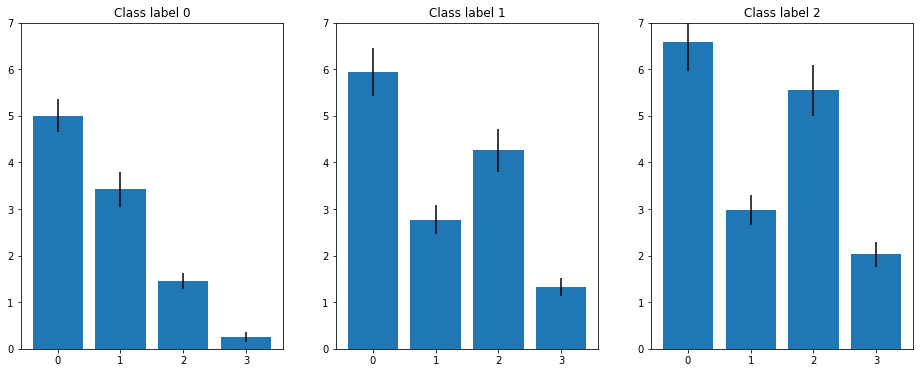

In [55]:
figure(figsize=(16,6))
for c in classes:
    plt.subplot(1,3,c+1)
    plt.bar([0,1,2,3], means[c], yerr=stds[c])
    plt.ylim([0., 7.])
    plt.title('Class label ' + str(c))

### Graphical visualization

The feature dimension is **4**, which makes it hard to visualize in a simple 2-d plot. There are several ways to reduce the dimensions of a dataset. This procedure is simply called *dimension reduction*. I won't detail these techniques here, it is beyond the scope of this lecture. What we will do instead is to select manually two dimensions among the 4 in order to plot the data on a 2-d graph. 

We start by selecting the two first dimensions and visualize them in a scatter plot.

In [56]:
data_x = features[:,0] # sepal length
data_y = features[:,1] # sepal width

In [57]:
plt.rcParams['image.cmap'] = 'Set1'
cmap = matplotlib.cm.get_cmap('Set1')

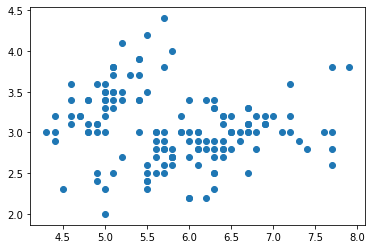

In [58]:
plt.scatter(data_x, data_y)

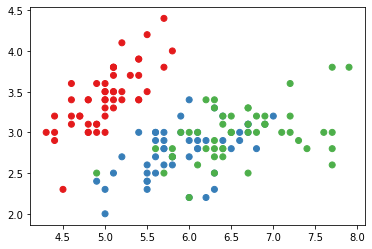

In [59]:
plt.scatter(data_x, data_y, c=cmap(labels))

**NOTE**: graphs always need legends and axis labelling!!

In [60]:
from basics.utils import get_iris_data
features_c0, _, _ = get_iris_data(classes=[0])
features_c1, _, _ = get_iris_data(classes=[1])
features_c2, _, _ = get_iris_data(classes=[2])

In [61]:
dim1 = 0
dim2 = 1

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


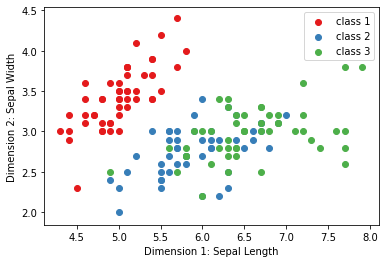

In [62]:
data_x = features_c0[:,dim1] # sepal length
data_y = features_c0[:,dim2] # sepal width
scatter(data_x, data_y, c=cmap(0), label='class 1')

data_x = features_c1[:,dim1] # sepal length
data_y = features_c1[:,dim2] # sepal width
scatter(data_x, data_y, c=cmap(1), label='class 2')

data_x = features_c2[:,dim1] # sepal length
data_y = features_c2[:,dim2] # sepal width
scatter(data_x, data_y, c=cmap(2), label='class 3')

xlabel("Dimension 1: Sepal Length")
ylabel("Dimension 2: Sepal Width")
legend()

**QUESTIONS**: 
- What can we say on the data based on this graph?
- Can we find a better representation space?

<img src="assets/exerice-icon.png" style="width:80px; float:left;"></img><div style="clear:left;"></div>
**EXERCICE:** Visualise other dimensions of the dataset. Try to find the best visualisation

Text(0, 0.5, 'column 3')

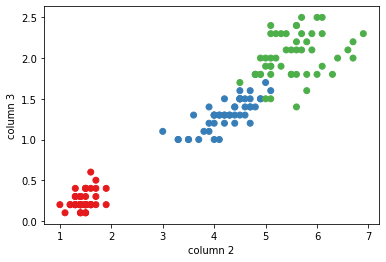

In [68]:
data_x = features[:,2] # petal length
data_y = features[:,3] # petal width
plt.scatter(data_x, data_y, c=cmap(labels))
plt.xlabel('column 2')
plt.ylabel('column 3')

Here we could find an heuristics to classify new datapoints as being in class 1, 2 or 3.

Exploring by hand may be good to understand the data but it is too tedious to find the best criteria highlighting patterns in the data. That's why **Machine Learning** exists: finding underlying patterns and being able to generalise, that is make prediction, based on these patterns, on unseen data.

<a name="toyex_training"></a>
# Training a Classifier on the Iris Dataset

As use case, we will explore classifier training with the **Support Vector Machine (SVM)**. The support vector machine, in its simplest version, is a **linear discriminant model** which means that the technique tries to discriminate between classes using lieanr function (basically lines in 2D, planes in 3D, hyperplanes otherwise). 

Another way to say it is that the **decision boundaries** are linear. 

Useful readings (although a bit techncial) to know more about SVM:
* C Cortes, V Vapnik. Support-vector networks. _Machine learning_ 20 (3), 273-297, 1995
* B Schölkopf, AJ Smola. Learning with kernels: support vector machines, regularization, optimization, and beyond. *MIT press*, 2002

SVM in sklearn can be imported simply using:

In [69]:
from sklearn import svm

Initialize a new SVM instance called `classifier`:

In [70]:
classifier = svm.SVC()

In [71]:
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

We use the linear version (simpler) of support vector machine:

<img src='assets/clf_lin_nonlin.png' style='width:70%'></img>

In [72]:
classifier = svm.SVC(kernel='linear')

In [73]:
classifier

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Training SVM

Reminder: classification is a **supervised learning** task, meaning that it learns the function mapping feature samples to known labels. 

In [ ]:
for n in np.random.randint(len(labels), size=10):
    print(features[n,:], '\t==> ', labels[n])

### Training function: `fit()`

In `scikit-learn`, any trainable method has a function called `fit()` which takes a set of features and a set of corresponding labels as arguments, and trains the model:
* `fit` is the generic function to train any methods in `sklearn`
* for supervised methods, `fit` accepts two arguments: the feature data and their labels, that is `fit(X_train, y_train)`
* for unsupervised methods, `fit` accepts only one argument: the feature data, that is `fit(X_train)`

Training on the full dataset:

In [74]:
classifier.fit(features, labels);

Training on the two dimensions visualized previously:

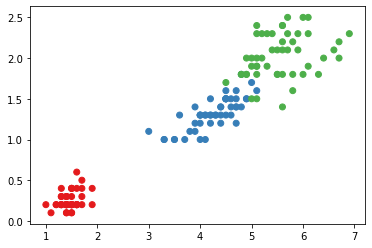

In [75]:
data_x = features[:,2] # petal length
data_y = features[:,3] # petal width
scatter(data_x, data_y, c=cmap(labels))

classifier.fit(features[:,2:], labels);

### Understanding *training* in SVM

Understanding training procedure in machine learning starts by understanding the **decision boundary** which is the set of borders delimiting regions in the feature space associated to each labels. Let's take the two last dimensions of the iris data:

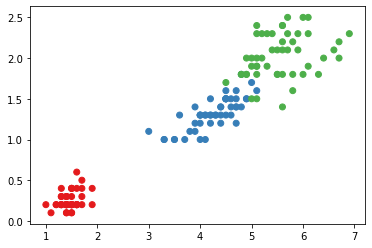

In [76]:
scatter(features[:,2], features[:,3], c=cmap(labels))

Let's consider only two classes given by the <span style="color:#DD0000;">**RED**</span> and <span style="color:#0000DD;">**BLUE**</span> colours (class 0 and 1 respectively)

In [77]:
from basics.utils import get_iris_data
features, labels, colors = get_iris_data(classes=[0,1])
print(colors.shape, features.shape, labels.shape)

(100, 4) (100, 4) (100,)


In [78]:
X_train = features[:, 2:]
y_train = labels

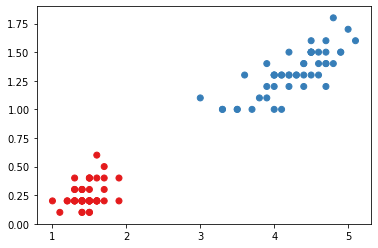

In [79]:
scatter(X_train[:,0], X_train[:,1], color=colors)

**Question: what is the best decision boundary between classes 0 and 1?**

Linear models, such as SVM, consider linear decision boundaries. In a 2-dimensional space, a linear decision boundary is a **line**. A line can be defined by 2 parameters:

In [81]:
slope = -0.1
intercept = 1.2

We generate the corresponding line:

In [82]:
boundary_x = np.linspace(1,5)
boundary_y = slope * boundary_x + intercept

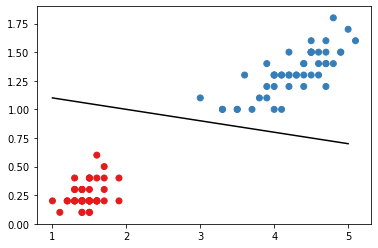

In [83]:
scatter(X_train[:,0], X_train[:,1], color=colors)
plot(boundary_x, boundary_y, '-k')

**Question: Is that good enough?**

Let's imagine that we have a new point coming in with data `(3.5, 0.7)`

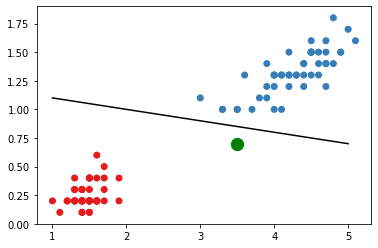

In [84]:
scatter(X_train[:,0], X_train[:,1], c=colors)
plot(boundary_x, boundary_y, '-k')
scatter(3.5, 0.7, c='green', s=150)

What do you think? Which class does the blue point belong to? 

Let's try other values for the slope and the intercept...

In [85]:
slope = -1.0
intercept = 3.2

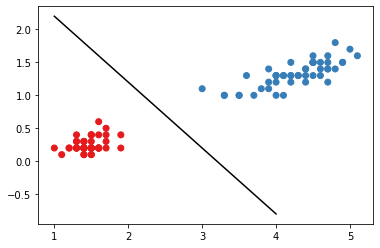

In [86]:
boundary_x = np.linspace(1,4)
boundary_y = slope * boundary_x + intercept

scatter(X_train[:,0], X_train[:,1], c=colors)
plot(boundary_x, boundary_y, '-k')

=> Looks better....

About **training** in SVM:
* means finding the **best parameters** wrt the set of samples
* can often be understood as an **OPTIMIZATION** problem (i.e. finding a decision boundary such as miminzing a certain **cost function**)

In [87]:
classifier.fit(features[:,2:], labels);

In [88]:
coefs = classifier.coef_[0]
slope = -coefs[0] / coefs[1]
intercept = classifier.intercept_[0] / coefs[1]

In [89]:
slope

-1.5714285714285714

In [90]:
intercept

-4.685714244842528

In [91]:
boundary_x = np.linspace(1.5,3.5)
boundary_y = slope * boundary_x - intercept

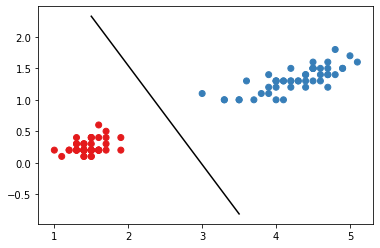

In [92]:
scatter(X_train[:,0], X_train[:,1], c=colors)
plot(boundary_x, boundary_y, '-k')

<img src="assets/exerice-icon.png" style="width:80px; float:left;"></img><div style="clear:left;"></div>
**EXERCICE:** Train a SVM classifier on the 4-dimensional feature data. What does it change? 

In [ ]:
# TODO

### Visualising boundaries as regions

Instead of visualising the decision boundary, it is sometimes clearer to highlight regions of each class. 

In [93]:
mesh_x = np.linspace(0.75, 5.3, 200)
mesh_y = np.linspace(-0.8, 2.5, 200)

In [94]:
classifier.fit(features[:,2:], labels);

In [95]:
decision_area = np.zeros((len(mesh_x), len(mesh_y)))
for i, x in enumerate(mesh_x):
    for j, y in enumerate(mesh_y):
        data_point = np.array([x, y]).reshape(1, 2)
        decision_area[i,j] = classifier.predict(data_point)

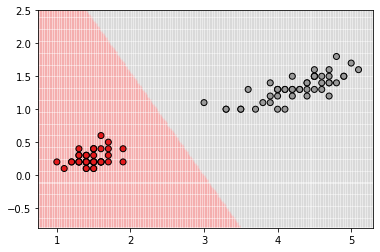

In [96]:
pcolormesh(mesh_x, mesh_y, decision_area.T, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='black')

**QUESTION**: Why is it useful? 

-> Linked to the goal of machine learning in general: **generalisability**

Let's inspect more complex decision boundaries

In [97]:
features, labels, colors = get_iris_data(classes=[0,1])
X_train = features[:, 2:]
y_train = labels
classifier = svm.SVC(kernel='rbf') # <= NON-LINEAR 
classifier.fit(X_train, y_train);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


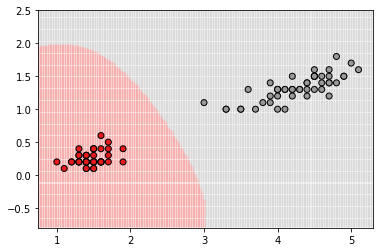

In [98]:
decision_area = np.zeros((len(mesh_x), len(mesh_y)))
for i, x in enumerate(mesh_x):
    for j, y in enumerate(mesh_y):
        data_point = np.array([x, y]).reshape(1, 2)
        decision_area[i,j] = classifier.predict(data_point)
        
pcolormesh(mesh_x, mesh_y, decision_area.T, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='black')

### Visualising region boundaries of another type of classifier

We consider *kNN*: **k-Nearest Neighbour** (in sklearn: `neighbors.KNeighborsClassifier()`)

If you don't know kNN, this classification algorithm assigns a label to a new input vector from a majority vote of its k nearest neighbors:

![kNN](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png "kNN")

Sklearn page: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [99]:
from sklearn.neighbors import KNeighborsClassifier

Training:

In [100]:
features, labels, colors = get_iris_data(classes=[0,1])
X_train = features[:, 2:]
y_train = labels
classifier = KNeighborsClassifier(n_neighbors=1) # <= NON-LINEAR 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Plotting:

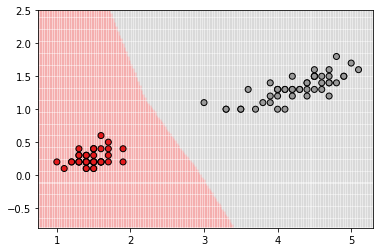

In [101]:
decision_area = np.zeros((len(mesh_x), len(mesh_y)))
for i, x in enumerate(mesh_x):
    for j, y in enumerate(mesh_y):
        data_point = np.array([x, y]).reshape(1, 2)
        decision_area[i,j] = classifier.predict(data_point)
        
pcolormesh(mesh_x, mesh_y, decision_area.T, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='black')

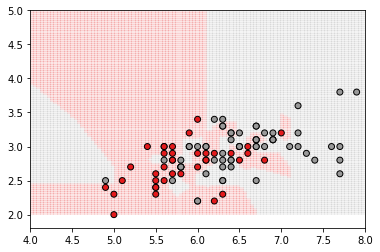

In [102]:
features, labels, colors = get_iris_data(classes=[1,2])
X_train = features[:, :2]
y_train = labels
classifier = KNeighborsClassifier(n_neighbors=1) # <= NON-LINEAR 
classifier.fit(X_train, y_train)
mesh_x = np.linspace(4.0, 8.0, 100)
mesh_y = np.linspace(2.0, 5.0, 100)
decision_area = np.zeros((len(mesh_x), len(mesh_y)))
for i, x in enumerate(mesh_x):
    for j, y in enumerate(mesh_y):
        data_point = np.array([x, y]).reshape(1, 2)
        decision_area[i,j] = classifier.predict(data_point)
pcolormesh(mesh_x, mesh_y, decision_area.T, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='black')

<a name="toyex_multiclass"></a>
## Multiclass Problem

Until now we have only seen the special case of discriminating between two classes: 0 or 1. But most of the real-world problems are actually dealing with multiple classes. For instance, in self-driving car, the car needs to discriminate between a human crossing the street, a dog crossing the street, a sign, another car, a truck, a bike, etc... The number of classes can be very high. 

Here, within our toy example, we will simply add the left-aside class and examine how it affects the decision boundarues as visualised before. Note that we are still using the two last dimensions of the data for the sake of understanding and visualisation. 

In [103]:
features, labels, colors = get_iris_data(classes=[0, 1, 2])
X_train = features[:, 2:]
y_train = labels
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train);

When dealing with more than one class, SVM finds decision boundaries between pair of classes:
* Class 1 vs. Class 2
* Class 1 vs. Class 3
* Class 2 vs. Class 3

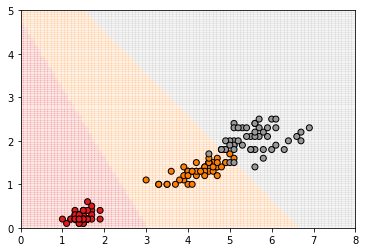

In [104]:
mesh_x = np.linspace(0.0, 8.0, 100)
mesh_y = np.linspace(0.0, 5.0, 100)
decision_area = np.zeros((len(mesh_x), len(mesh_y)))
for i, x in enumerate(mesh_x):
    for j, y in enumerate(mesh_y):
        data_point = np.array([x, y]).reshape(1, 2)
        decision_area[i,j] = classifier.predict(data_point)
pcolormesh(mesh_x, mesh_y, decision_area.T, alpha=0.1)
scatter(X_train[:,0], X_train[:,1], c=y_train, edgecolor='black')

<img src="assets/exerice-icon.png" style="width:80px; float:left;"></img><div style="clear:left;"></div>
**EXERCICE:** What are the decision regions for a `1-NN` in the of the multiclass problem? 

In [ ]:
# TODO

<a name="toyex_testing"></a>
# Testing a Classifier on the Iris Dataset

Testing a classifier is to inspect if the classifier performs a good prediction (estimated the label/class) on data that **are not included** in the dataset used to train it. 

The general objective of ML is indeed to test the **generalizability** of the trained algorithm. 

Algorithms can then be compared based on their prediction capabilities. Prediction capability is usually reported as accuracy percentage: what is the percentage of the testing dataset that has been correctly classified (predicted).

In order to test a classifier, we then need to split the whole dataset into a training dataset on which the classifier will be trained and a testing dataset on which we will test the prediciton capabilities. 

<img src='./assets/crossval_split_training_testing.png' style="width:40%"></img>

## Prepare the data

One option is to shuffle the dataset and select 20% for testing and 80% for training

**QUESTION**: Why shuffling? 

To shuffle the dataset, let's first get indexes to browse the whole dataset

In [105]:
features, labels, _ = get_iris_data()

In [108]:
idx = np.arange(len(features))

In [109]:
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

Shuffle indexes

In [110]:
random.shuffle(idx)

In [111]:
idx

array([ 84,  26,  51,  38,  63,  30,   1, 131,  48,  85,  66,  27,  95,
        78,  12, 129,  81,  42, 139, 117,  65,  92,  53,  73, 147,  35,
        62,  97,  28, 111, 128,  25,  68, 119, 101,  64,  89, 127, 124,
       142,  88,  82, 121,   6,  69,  19,  83,   5,  49,   0,  70,  59,
        18,  94, 130,  99,  33,  23,  45,  55,  37,  67, 143,  74,   9,
       102,  34,  86, 109,  10,  58, 133,  41,  98,   3, 138, 113, 136,
         4,  22,  75, 135,  31, 108, 148, 118, 132,  54, 107,  80, 125,
       126,  87,  17,  20, 120, 134, 145,  24,  90, 149,  44,  77,  39,
        79, 106, 123, 122,  57,  40, 144,   8, 104, 114,  91, 100,  72,
       116, 146,  47, 115,  15, 112, 110, 137,  60,  11,  76, 103,  29,
        43,  21,  13,   2,  61,  50,  93,  52,  16,  56, 141, 140,  96,
         7, 105,  46,  36,  14,  71,  32])

Shuffle the whole dataset

In [112]:
features = features[idx]

Shuffle the labels the **exact same way**

In [113]:
labels = labels[idx]

In [114]:
labels

array([1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1,
       1, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2,
       0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0])

Create your splits:

In [115]:
train_X = features[:int(0.8 * len(features)), :]
train_Y = labels[:int(0.8 * len(labels))]

In [116]:
test_X = features[int(0.8 * len(features)):, :]
test_Y = labels[int(0.8 * len(labels)):]

In [117]:
print(len(train_X))
print(len(test_X))

120
30


## Test classification by computing the accuracy

In [118]:
# init SVM classifier
classifier = svm.SVC(kernel='linear')

In [119]:
# train VM classifier
classifier.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [120]:
# test SVM classifier and store output
pred_Y = classifier.predict(test_X)

In [121]:
pred_Y

array([2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2,
       1, 0, 2, 0, 0, 0, 1, 0])

Counting the number of errors of our prediction:

In [122]:
num_errors = 0
for i,yi in enumerate(pred_Y):
    if (yi != test_Y[i]):
        num_errors += 1

In [123]:
num_errors

0

Performance in percentage:

In [124]:
( 1.0 - num_errors/len(pred_Y) ) * 100.0

100.0

This is the classification accuracy in percentage on the current set of training/testing datasets. The **worst classifier** would have returned 50% (_chance level_). In sklearn we can directly compute the score with the `score()` function:

In [125]:
# sklearn function
score = classifier.score(test_X, test_Y)

In [126]:
score

1.0

**QUESTION:** Can we say that this classifier has 93.3% accuracy?

### Assess generalizability

We tested only on one split, what if the split leads to particularly well disciminated training dataset but not testing dataset. Or the contrary... The idea is to consider more than one split, to compute the score on each split and then compute the average (and the variance of the scores) which gives a more robust way (statistically) to assess a classification algorithm.

<img src="assets/exerice-icon.png" style="width:80px; float:left;"></img><div style="clear:left;"></div>
**EXERCICE:** perform `N` (e.g. 20) varying the splits and inspect the robustness of the classifier

In [128]:
# TODO
all_scores = []
for i in range(100):
    
    features, labels, _ = get_iris_data()
    idx = np.arange(len(features))
    random.shuffle(idx)
    
    features = features[idx]
    labels = labels[idx]
    
    train_X = features[:int(0.8 * len(features)), :]
    train_Y = labels[:int(0.8 * len(labels))]
    test_X = features[int(0.8 * len(features)):, :]
    test_Y = labels[int(0.8 * len(labels)):]
    
    classifer = svm.SVC(kernel='linear')
    classifier.fit(train_X, train_Y)
    score = classifier.score(test_X, test_Y)
    
    all_scores.append(score)

print("'True' accuracy =", np.mean(all_scores))

'True' accuracy = 0.9786666666666668


In [ ]:
print(np.mean(all_scores)*100)

In [ ]:
print(np.std(all_scores)*100)

In [ ]:
plt.plot(all_scores, '--o')
plt.ylim([0.9, 1.01])

___
About this material: copyright Baptiste Caramiaux (write me for any questions or use of this material [email](mailto:baptiste.caramiaux@lri.fr))
___